In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pydotplus

In [10]:
from google.colab import drive
drive.mount('/content/drive')
data1 = pd.read_csv('/content/drive/MyDrive/Iris.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data1["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
data_group = data1.groupby("Species")
data_group

In [14]:
for i in data_group:
  print(i)

('Iris-setosa',     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1

In [15]:
data_group.corr()

Id  SepalLengthCm  SepalWidthCm  \
Species                                                                
Iris-setosa     Id             1.000000      -0.033561     -0.066688   
                SepalLengthCm -0.033561       1.000000      0.746780   
                SepalWidthCm  -0.066688       0.746780      1.000000   
                PetalLengthCm  0.053253       0.263874      0.176695   
                PetalWidthCm   0.087492       0.279092      0.279973   
Iris-versicolor Id             1.000000      -0.269056     -0.081867   
                SepalLengthCm -0.269056       1.000000      0.525911   
                SepalWidthCm  -0.081867       0.525911      1.000000   
                PetalLengthCm -0.189481       0.754049      0.560522   
                PetalWidthCm  -0.168846       0.546461      0.663999   
Iris-virginica  Id             1.000000      -0.012549      0.130884   
                SepalLengthCm -0.012549       1.000000      0.457228   
                SepalWidthCm   0.130884       0.457228      1.000000   
                PetalLengthCm -0.204204       0.864225      0.401045   
                PetalWidthCm   0.036446       0.281108      0.537728   

                               PetalLengthCm  PetalWidthCm  
Species                                                     
Iris-setosa     Id                  0.053253      0.087492  
                SepalLengthCm       0.263874      0.279092  
                SepalWidthCm        0.176695      0.279973  
                PetalLengthCm       1.000000      0.306308  
                PetalWidthCm        0.306308      1.000000  
Iris-versicolor Id                 -0.189481     -0.168846  
                SepalLengthCm       0.754049      0.546461  
                SepalWidthCm        0.560522      0.663999  
                PetalLengthCm       1.000000      0.786668  
                PetalWidthCm        0.786668      1.000000  
Iris-virginica  Id                 -0.204204      0.036446  
                SepalLengthCm       0.864225      0.281108  
                SepalWidthCm        0.401045      0.537728  
                PetalLengthCm       1.000000      0.322108  
                PetalWidthCm        0.322108      1.000000

In [16]:
def converter(s):
  s = s.lower()
  if s == "iris-setosa":
    return 0
  elif s == "iris-versicolor":
    return 1
  elif s == "iris-virginica":
    return 2
  else:
    return -1


In [17]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv",converters={"Species":converter})

In [18]:
data.shape

(150, 6)

In [19]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [20]:
data1.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
labels = data["Species"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3)

In [23]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [24]:
model.predict(X_test)

array([2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0,
       1])

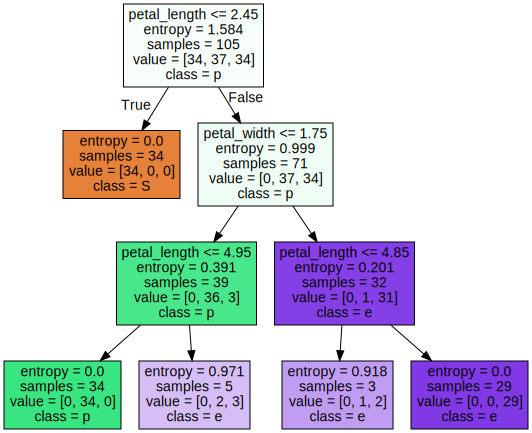

In [25]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                class_names="Species",
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph